In [136]:
import matplotlib.pyplot as pl
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [4]:
image_shape=people.images[0].shape

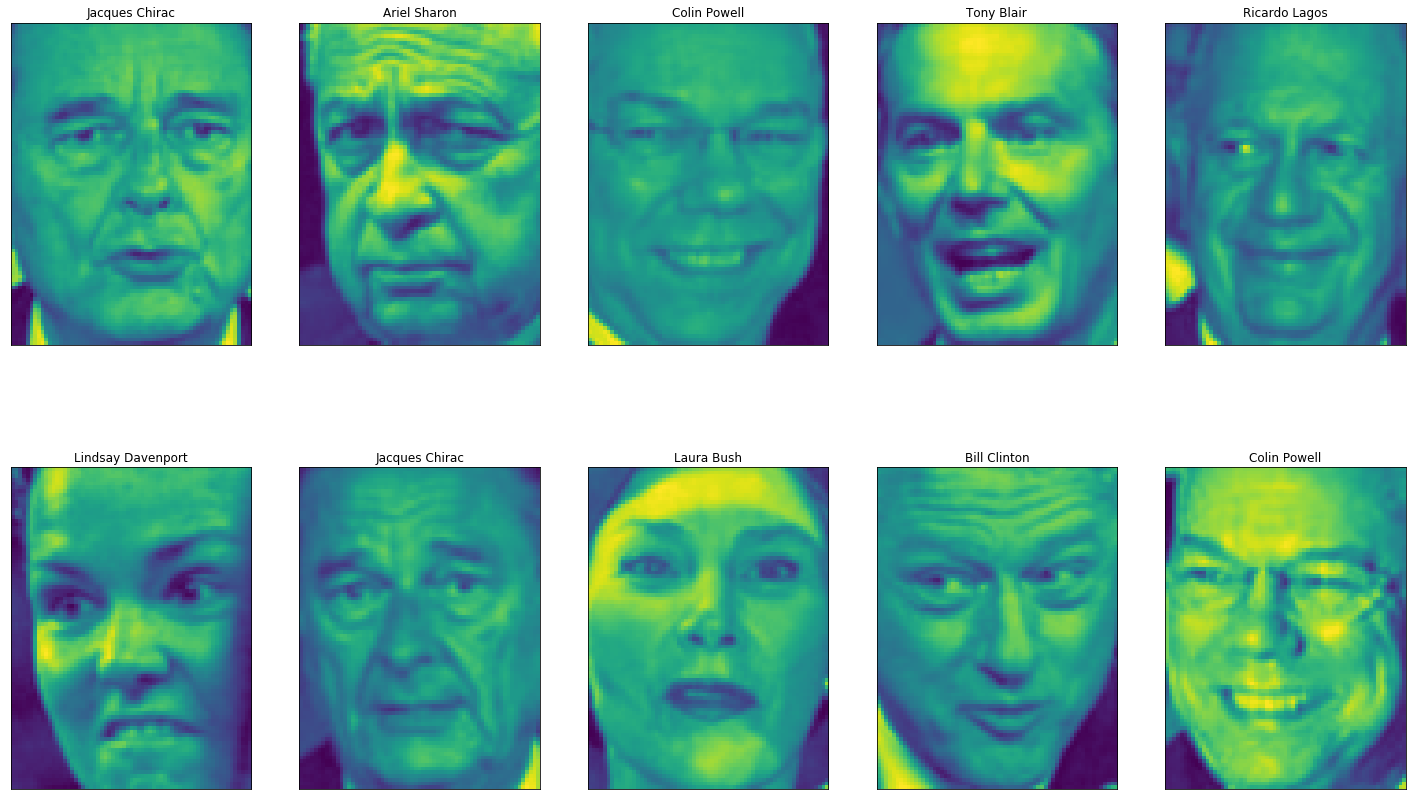

In [21]:
fig,axes=pl.subplots(2,5,figsize=(25,15),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [10]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [23]:
import numpy as np
counts=np.bincount(people.target)

In [24]:
counts

array([ 39,  35,  21,  36,  77,  24,  29, 236,  31, 121,  22, 530, 109,
        44,  26,  22,  39,  71,  20,  28,  52,  55,  21,  42,  21,  53,
        28,  60,  32,  41,  22,  41,  33,  20,  22,  27,  26,  23,  52,
        23,  25,  33, 144,  32,  49], dtype=int64)

In [30]:
for i,(count,name) in enumerate(zip(counts,people.target_names)):
    print('{0:25}{1:3}'.format(name,count),end='  ')
    if(i+1)%3==0:
        print()

Alejandro Toledo          39  Alvaro Uribe              35  Amelie Mauresmo           21  
Andre Agassi              36  Ariel Sharon              77  Atal Bihari Vajpayee      24  
Bill Clinton              29  Colin Powell             236  David Beckham             31  
Donald Rumsfeld          121  George Robertson          22  George W Bush            530  
Gerhard Schroeder        109  Gloria Macapagal Arroyo   44  Gray Davis                26  
Hamid Karzai              22  Hans Blix                 39  Hugo Chavez               71  
Igor Ivanov               20  Jack Straw                28  Jacques Chirac            52  
Jean Chretien             55  Jennifer Aniston          21  Jennifer Capriati         42  
Jennifer Lopez            21  John Ashcroft             53  Juan Carlos Ferrero       28  
Junichiro Koizumi         60  Kofi Annan                32  Laura Bush                41  
Lindsay Davenport         22  Lleyton Hewitt            41  Megawati Sukarnoputri     33  

In [117]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

In [118]:
X_people=people.data[mask]
y_people=people.target[mask]
people.target.shape,mask.shape
# np.sum(mask==people.target.shape)


((2537,), (2537,))

In [119]:
X_people=X_people/255.
X_people

array([[0.29411766, 0.38039216, 0.46535948, ..., 0.1751634 , 0.12810458,
        0.13725491],
       [0.05882353, 0.15686275, 0.3764706 , ..., 0.3712418 , 0.3084967 ,
        0.2614379 ],
       [0.42875817, 0.40392157, 0.39607844, ..., 0.05359477, 0.06013072,
        0.06405229],
       ...,
       [0.36732024, 0.4130719 , 0.44705883, ..., 0.9490196 , 0.95816994,
        0.96732026],
       [0.26666668, 0.3359477 , 0.5019608 , ..., 0.37908494, 0.3830065 ,
        0.39084965],
       [0.04705882, 0.05751634, 0.04183007, ..., 0.9359477 , 0.9228758 ,
        0.93333334]], dtype=float32)

(87, 65)

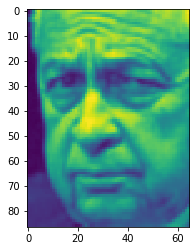

In [126]:
pl.imshow(people.images[1])
people.images[1].gr

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,
                                stratify=y_people,random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.27848101265822783

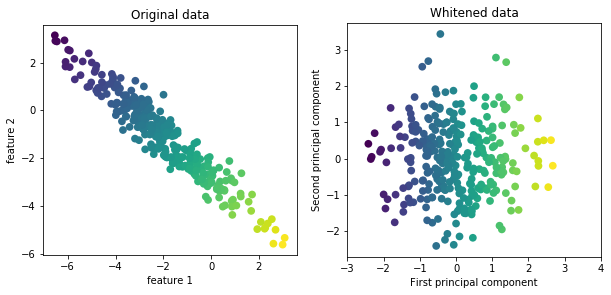

In [150]:
import mglearn
mglearn.plots.plot_pca_whitening()

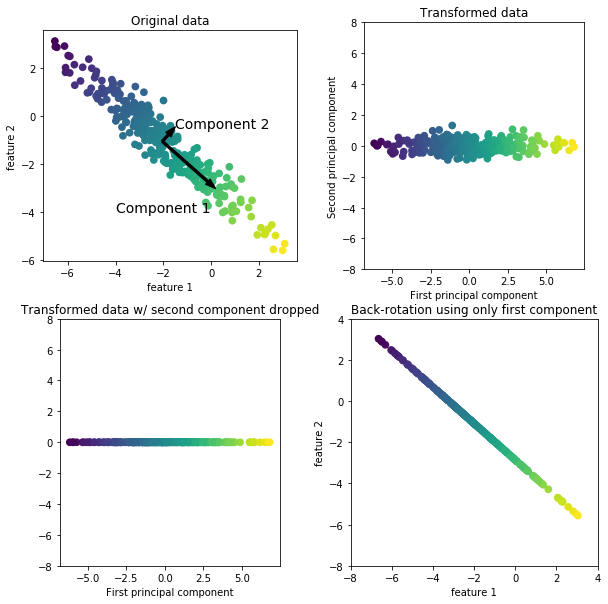

In [151]:
mglearn.plots.plot_pca_illustration()

In [152]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_trainPCA=pca.transform(X_train)
X_testPCA=pca.transform(X_test)

In [153]:
X_testPCA.shape,y_test.shape

((395, 100), (395,))

In [155]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_trainPCA,y_train)
knn.score(X_testPCA,y_test)

0.3392405063291139